In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../OptFuture_NSMDP')
from scipy.stats import t
from scipy.signal import savgol_filter


In [30]:
def ci(_mean, _var, n, conf=0.95):
    _sample_standard_deviation = np.sqrt(_var)
    _standard_error_of_the_mean = _sample_standard_deviation / np.sqrt(n)
    _low, _high = t.interval(conf, n-1, loc=_mean, scale=_standard_error_of_the_mean)
    return _low, _high


# Recommender System Environment

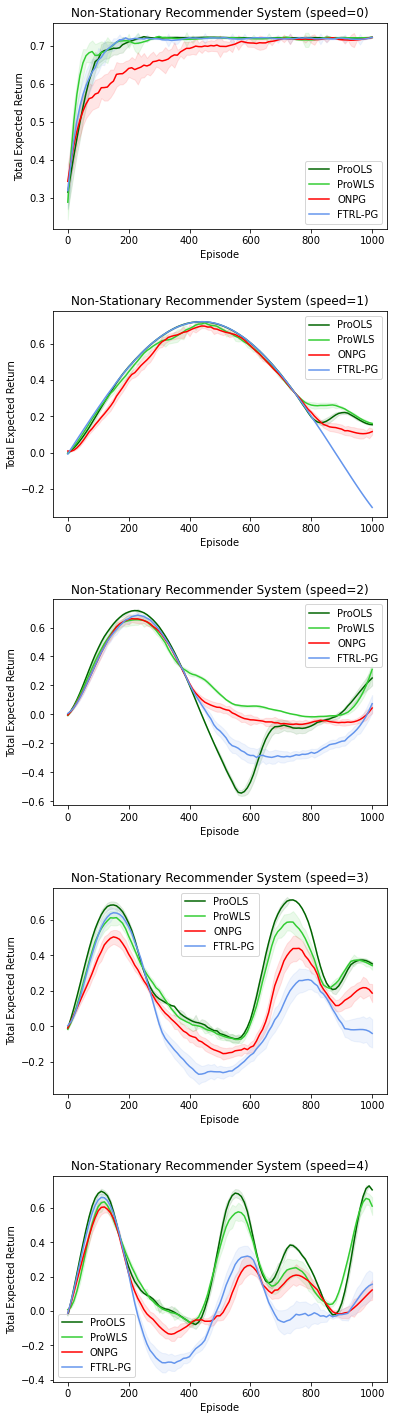

In [138]:
fig, ax = plt.subplots(5,figsize=(6,25))

for b in range(5):
    all_data = np.zeros((101,30))
    k=0
    
    algorithms = ['ProOLS','ProWLS', 'ONPG', 'FTRL-PG']
    col = ['darkgreen','limegreen','red','cornflowerblue']
    
    for j in algorithms:
        for i in range(30):
            data = np.load('../OptFuture_NSMDP/Experiments/NS_Reco/'+j+'/NS_'+str(b)+'_Default/'+str(i)+"/Results/"+str(i)+'_rewards.npy')
            all_data[:,i] = data
        #plt.plot(np.mean(all_data,axis=1))
        centers = np.mean(all_data,axis=1)
        centers = savgol_filter(centers,15,3)
        var = np.var(all_data,axis=1)
        low,high = centers-np.sqrt(var)/np.sqrt(30),centers+np.sqrt(var)/np.sqrt(30)#ci(centers, var, n=30, conf=0.95)
        ax[b].plot(np.arange(0,1010,10),centers,color=col[k],label=j)
        ax[b].fill_between(np.arange(0,1010,10),(low), (high), color=col[k], alpha=.1)
        ax[b].set_title(("Non-Stationary Recommender System (speed="+str(b)+")"))
        ax[b].set_xlabel("Episode")
        ax[b].set_ylabel("Total Expected Return")
        k += 1
        ax[b].legend()
plt.subplots_adjust(hspace=0.4)

plt.savefig('reco_all.png')
        

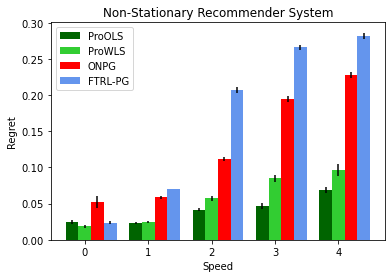

In [136]:
for b in range(5):
    
    all_data = np.zeros((30))
    std_data = np.zeros((30))
    
    algorithms = ['ProOLS','ProWLS', 'ONPG', 'FTRL-PG']
    col = ['darkgreen','limegreen','red','cornflowerblue']
    k=0
    for j in algorithms:
        for i in range(30):
            data = np.load('../OptFuture_NSMDP/Experiments/NS_Reco/'+j+'/NS_'+str(b)+'r_Default/'+str(i)+"/Results/"+str(i)+'_rewards.npy')
            all_data[i] = np.mean(-data)
    
        plt.bar((b*5+k)/5-0.2, height=np.mean(all_data), color=col[k],yerr=np.std(all_data)/np.sqrt(30), align='center',label=j, width=0.2)
        k+=1
        if b==0: plt.legend()
plt.title('Non-Stationary Recommender System')
plt.xlabel('Speed')
plt.ylabel('Regret')
plt.savefig('reco.png')
plt.show()



# Goal Reacher Environment

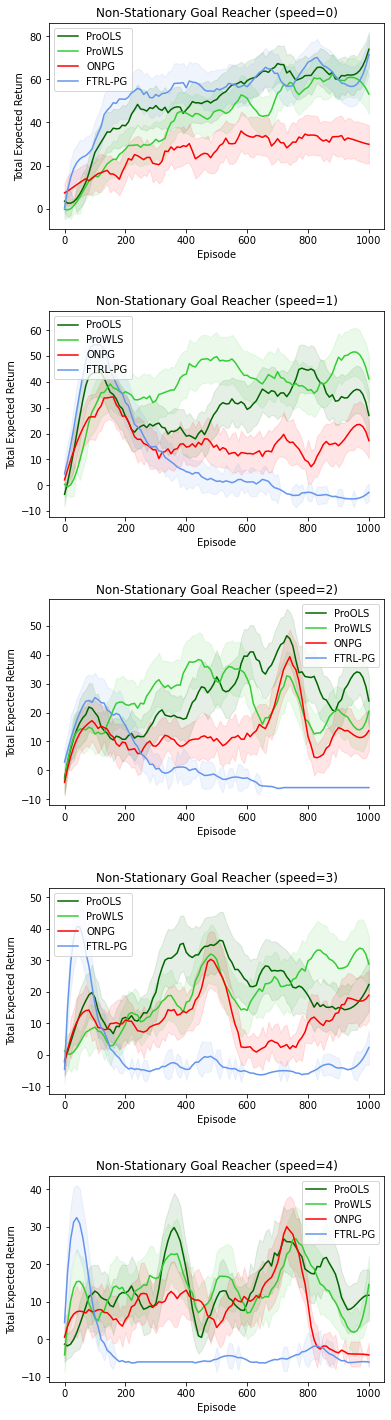

In [139]:
fig, ax = plt.subplots(5,figsize=(6,25))

for b in range(5):
    all_data = np.zeros((101,30))
    k=0
    
    algorithms = ['ProOLS','ProWLS', 'ONPG', 'FTRL-PG']
    col = ['darkgreen','limegreen','red','cornflowerblue']
    
    for j in algorithms:
        for i in range(30):
            data = np.load('../OptFuture_NSMDP/Experiments/NS_Reacher/'+j+'/NSSpeed'+str(b)+'/'+str(i)+"/Results/"+str(i)+'_rewards.npy')
            all_data[:,i] = data
        #plt.plot(np.mean(all_data,axis=1))
        centers = np.mean(all_data,axis=1)
        centers = savgol_filter(centers,15,3)
        var = np.var(all_data,axis=1)
        low,high = centers-np.sqrt(var)/np.sqrt(30),centers+np.sqrt(var)/np.sqrt(30)#ci(centers, var, n=30, conf=0.95)
        ax[b].plot(np.arange(0,1010,10),centers,color=col[k],label=j)
        ax[b].fill_between(np.arange(0,1010,10),(low), (high), color=col[k], alpha=.1)
        ax[b].set_title(("Non-Stationary Goal Reacher (speed="+str(b)+")"))
        ax[b].set_xlabel("Episode")
        ax[b].set_ylabel("Total Expected Return")
        k += 1
        ax[b].legend()
plt.subplots_adjust(hspace=0.4)

plt.savefig('reacher_all.png')
        

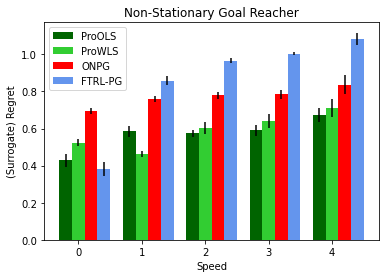

In [135]:
# Evaluate surrogate regrets
col = ['darkgreen','limegreen','red','cornflowerblue']
algorithms = ['ProOLS','ProWLS', 'ONPG', 'FTRL-PG']
base_path = '../OptFuture_NSMDP/Experiments/NS_Reacher/'
num_seeds = 30
speed = 5
all_data = np.zeros((101,len(algorithms)))
all_regrets = np.zeros((speed, num_seeds, len(algorithms)))
for k in range(5):
    for i in range(num_seeds):
        for j, algo in enumerate(algorithms):
            data = np.load(base_path + algo + '/NSSpeed' + str(k) + '/' + str(i) +
                           "/Results/" + str(i) + '_rewards.npy')
            all_data[:,j] = data
        max_per_episode = np.max(all_data, axis=1)
        single_regrets = np.transpose(all_data) * (-1) + max_per_episode
        regrets = np.sum(single_regrets, axis=1) / np.sum(max_per_episode)
        regrets = regrets.reshape(-1)
        #print(regrets.shape)
        all_regrets[k, i, :] = regrets

mean_regrets = np.mean(all_regrets, axis=1)
mean_regrets.shape
std_regrets = np.std(all_regrets, axis=1) / np.sqrt(num_seeds)

fig, ax = plt.subplots()
x_pos = np.arange(speed)
for i, algo in enumerate(algorithms):
    ax.bar(-0.2+x_pos + 0.20*i, mean_regrets[:,i], yerr=std_regrets[:,i], color = col[i], align='center', width = 0.20, label=algo)
ax.set_ylabel('(Surrogate) Regret')
ax.set_xlabel('Speed')

ax.set_title('Non-Stationary Goal Reacher')
plt.legend()
#ax.yaxis.grid(True)
# Save the figure and show
#plt.savefig('bar_plot_with_error_bars.png')
plt.savefig('goal.png')
plt.show()



# Diabetes Treatment Environment

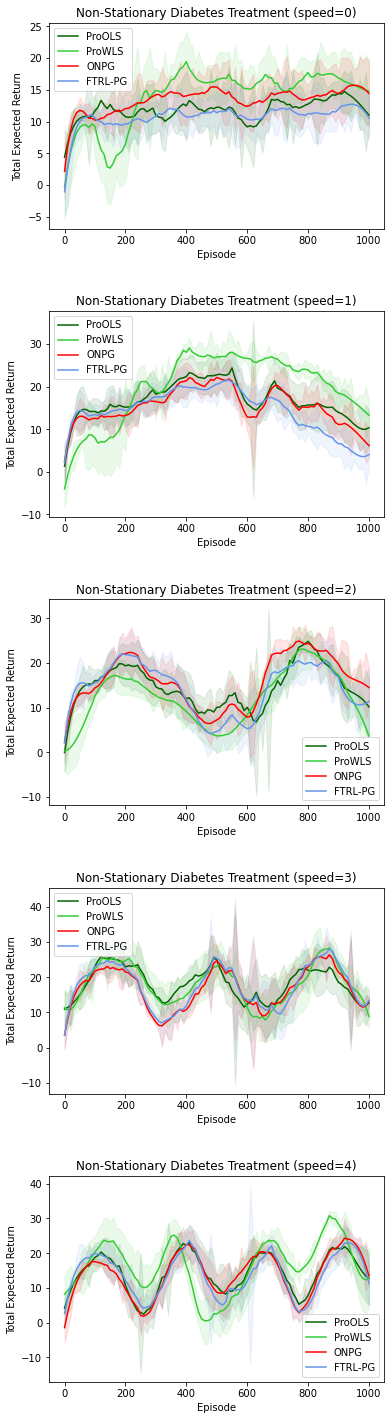

In [140]:
fig, ax = plt.subplots(5,figsize=(6,25))

for b in [0,1,2,3,4]:
    all_data = np.zeros((101,3))
    k=0

    algorithms = ['ProOLS','ProWLS', 'ONPG', 'FTRL-PG']
    col = ['darkgreen','limegreen','red','cornflowerblue']
    
    for j in algorithms:
        for i in range(3):
            data = np.load('../OptFuture_NSMDP/Experiments/NS_SimGlucose-v0/'+j+'/NS_'+str(b)+'_Default/'+str(i)+"/Results/"+str(i)+'_rewards.npy')
            all_data[:,i] = data
        #plt.plot(np.mean(all_data,axis=1))
        centers = np.mean(all_data,axis=1)
        centers = savgol_filter(centers,15,3)
        var = np.var(all_data,axis=1)
        low,high = centers-np.sqrt(var)/np.sqrt(3),centers+np.sqrt(var)/np.sqrt(3)#ci(centers, var, n=30, conf=0.95)
        ax[b].plot(np.arange(0,1010,10),centers,color=col[k],label=j)
        ax[b].fill_between(np.arange(0,1010,10),(low), (high), color=col[k], alpha=.1)
        ax[b].set_title(("Non-Stationary Diabetes Treatment (speed="+str(b)+")"))
        ax[b].set_xlabel("Episode")
        ax[b].set_ylabel("Total Expected Return")
        k += 1        
        ax[b].legend()

plt.subplots_adjust(hspace=0.4)

plt.savefig('glucose_all.png')


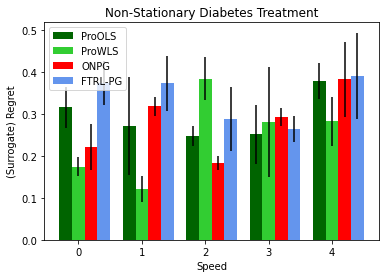

In [134]:
# Evaluate surrogate regrets
col = ['darkgreen','limegreen','red','cornflowerblue']
algorithms = ['ProOLS','ProWLS', 'ONPG', 'FTRL-PG']
base_path = '../OptFuture_NSMDP/Experiments/NS_SimGlucose-v0/'
num_seeds = 3
speed = 5
all_data = np.zeros((101,len(algorithms)))
all_regrets = np.zeros((speed, num_seeds, len(algorithms)))
for k in [0,1,2,3,4]:
    for i in range(num_seeds):
        for j, algo in enumerate(algorithms):
            data = np.load(base_path + algo + '/NS_' + str(k) + '_Default/' + str(i) +
                           "/Results/" + str(i) + '_rewards.npy')
            all_data[:,j] = data
        max_per_episode = np.max(all_data, axis=1)
        single_regrets = np.transpose(all_data) * (-1) + max_per_episode
        regrets = np.sum(single_regrets, axis=1) / np.sum(max_per_episode)
        regrets = regrets.reshape(-1)
        #print(regrets.shape)
        all_regrets[k, i, :] = regrets

mean_regrets = np.mean(all_regrets, axis=1)
mean_regrets.shape
std_regrets = np.std(all_regrets, axis=1) / np.sqrt(num_seeds)

fig, ax = plt.subplots()
x_pos = np.arange(speed)
for i, algo in enumerate(algorithms):
    ax.bar(-0.2+x_pos + 0.20*i, mean_regrets[:,i], yerr=std_regrets[:,i], color = col[i], align='center', width = 0.20, label=algo)
ax.set_ylabel('(Surrogate) Regret')
ax.set_xlabel('Speed')

ax.set_title('Non-Stationary Diabetes Treatment')
plt.legend()
#ax.yaxis.grid(True)
# Save the figure and show
#plt.savefig('bar_plot_with_error_bars.png')
plt.savefig('diabetes.png')
plt.show()

